In [2]:
 import pandas as pd
 import matplotlib.pyplot as plt
 from sklearn.model_selection import train_test_split
 from keras.models import Sequential
 from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
 import tensorflow as tf
 from sklearn.metrics import accuracy_score
 from sklearn.utils import shuffle
 import seaborn as sns
 import matplotlib.ticker as mtick
 import numpy as np
 from sklearn.metrics import confusion_matrix

## V formation

#### Wczytywanie danych

W pliku default.csv znajdują się wykresy bez formacji

W pliku proper.csv znajdują się pliki z formacją V

In [3]:
random = pd.read_csv('default.csv', index_col=0)

In [4]:
data = pd.read_csv('proper.csv', index_col=0)

In [5]:
together = pd.concat([data, random], axis = 0)

#### Ustawmy dane do odpowiednich rozmiarów

In [6]:
y = together['label'].astype('int').values.reshape(-1, 1)
X = together.drop('label', axis = 1)

In [7]:
X = X.values.reshape(2000, 144, 144)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Tworzymy model i dopasowujemy dane

In [76]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (144,144,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
# model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
# model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 144, 144, 32)      832       
                                                                 
 conv2d_5 (Conv2D)           (None, 144, 144, 32)      25632     
                                                                 
 conv2d_6 (Conv2D)           (None, 144, 144, 64)      18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 144, 144, 64)      36928     
                                                                 
 flatten_1 (Flatten)         (None, 1327104)           0         
                                                                 
 dense_2 (Dense)             (None, 256)               339738880 
                                                                 
 dense_3 (Dense)             (None, 1)                

In [10]:
model.compile(optimizer = 'adam' , loss = "binary_crossentropy", metrics=["accuracy"])

In [11]:
model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
40/40 [==============================] - 22s 446ms/step - loss: 1.3964 - accuracy: 0.6562 - val_loss: 0.4852 - val_accuracy: 0.8781
Epoch 2/10
40/40 [==============================] - 18s 440ms/step - loss: 0.2198 - accuracy: 0.9281 - val_loss: 0.1045 - val_accuracy: 0.9688
Epoch 3/10
40/40 [==============================] - 18s 440ms/step - loss: 0.0327 - accuracy: 0.9898 - val_loss: 0.0595 - val_accuracy: 0.9875
Epoch 4/10
40/40 [==============================] - 18s 455ms/step - loss: 0.0193 - accuracy: 0.9977 - val_loss: 0.0505 - val_accuracy: 0.9875
Epoch 5/10
40/40 [==============================] - 18s 452ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0669 - val_accuracy: 0.9875
Epoch 6/10
40/40 [==============================] - 18s 453ms/step - loss: 2.3768e-04 - accuracy: 1.0000 - val_loss: 0.0680 - val_accuracy: 0.9875
Epoch 7/10
40/40 [==============================] - 18s 440ms/step - loss: 1.5280e-04 - accuracy: 1.0000 - val_loss: 0.0693 - val_accuracy

#### Wizualizacja wyników modelu

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


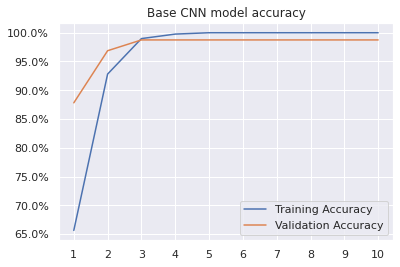

In [35]:
sns.set()
x = range(1, 11)

y = model.history.history['accuracy']

z = model.history.history['val_accuracy']

sns.lineplot(x, y, label = 'Training Accuracy').yaxis.set_major_formatter(mtick.PercentFormatter(1))
sns.lineplot(x, z, label = 'Validation Accuracy').yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title('Base CNN model accuracy')
plt.xticks(x)
plt.savefig('Base.svg');

#### Confusion matrix

In [60]:
pred = model.predict(X_test)

classes_x = np.round(pred).reshape(-1)

In [65]:
confusion_matrix(y_test, classes_x)

array([[184,   2],
       [  3, 211]])

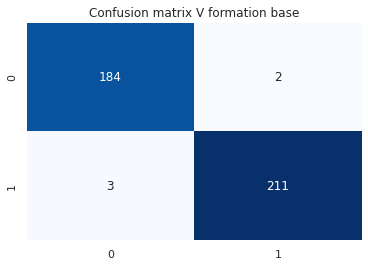

In [74]:
sns.heatmap(confusion_matrix(y_test, classes_x), annot = True, cbar = False, cmap = 'Blues', fmt = 'g')
plt.title('Confusion matrix V formation base')
plt.savefig('Confusion matrix V formation base.svg')

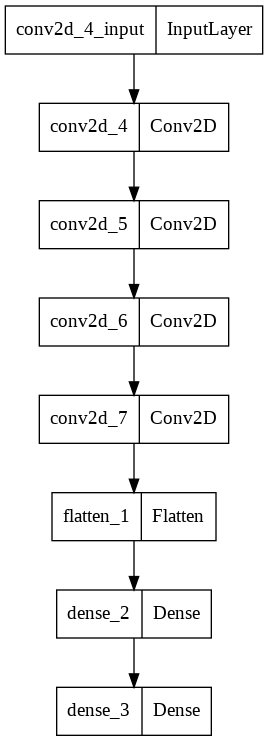

In [79]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

## Head and Shoulders Recognition

#### Wczytanie danych



In [3]:
random = pd.read_csv('default.csv', index_col=0)

In [4]:
hs_data = pd.read_csv('head_shoulders.csv', index_col=0)

In [5]:
together = pd.concat([hs_data, random], axis = 0)

#### Pokazanie danych w odpowiednim formatu

In [6]:
y = together['label'].astype('int').values.reshape(-1, 1)
X = together.drop('label', axis = 1)

In [7]:
X = X.values.reshape(2000, 144, 144)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Budowa i trenowanie modelu

In [9]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (144,144,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
# model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
# model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 144, 144, 32)      832       
                                                                 
 conv2d_1 (Conv2D)           (None, 144, 144, 32)      25632     
                                                                 
 conv2d_2 (Conv2D)           (None, 144, 144, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 144, 144, 64)      36928     
                                                                 
 flatten (Flatten)           (None, 1327104)           0         
                                                                 
 dense (Dense)               (None, 256)               339738880 
                                                                 
 dense_1 (Dense)             (None, 1)                 2

In [10]:
model.compile(optimizer = 'adam' , loss = "binary_crossentropy", metrics=["accuracy"])

In [11]:
model.fit(X_train, y_train, epochs = 15, batch_size = 60, validation_split = 0.2)

Epoch 1/15
22/22 [==============================] - 15s 360ms/step - loss: 6.1591 - accuracy: 0.5258 - val_loss: 0.8379 - val_accuracy: 0.5094
Epoch 2/15
22/22 [==============================] - 5s 244ms/step - loss: 0.7051 - accuracy: 0.5336 - val_loss: 0.6936 - val_accuracy: 0.4906
Epoch 3/15
22/22 [==============================] - 5s 245ms/step - loss: 0.6929 - accuracy: 0.5078 - val_loss: 0.6936 - val_accuracy: 0.4906
Epoch 4/15
22/22 [==============================] - 5s 248ms/step - loss: 0.6928 - accuracy: 0.5078 - val_loss: 0.6926 - val_accuracy: 0.5156
Epoch 5/15
22/22 [==============================] - 5s 247ms/step - loss: 0.6923 - accuracy: 0.5055 - val_loss: 0.6741 - val_accuracy: 0.7437
Epoch 6/15
22/22 [==============================] - 5s 247ms/step - loss: 0.6911 - accuracy: 0.5203 - val_loss: 0.6923 - val_accuracy: 0.4906
Epoch 7/15
22/22 [==============================] - 5s 250ms/step - loss: 0.6633 - accuracy: 0.6047 - val_loss: 0.6523 - val_accuracy: 0.5969
Epoch

#### Wizualizacja wyników

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


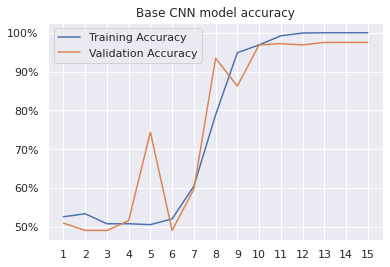

In [13]:
sns.set()
x = range(1, 16)

y = model.history.history['accuracy']

z = model.history.history['val_accuracy']

sns.lineplot(x, y, label = 'Training Accuracy').yaxis.set_major_formatter(mtick.PercentFormatter(1))
sns.lineplot(x, z, label = 'Validation Accuracy').yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title('Base CNN model accuracy')
plt.xticks(x)
plt.savefig('Base.svg');

#### Confusion matrix

In [14]:
pred = model.predict(X_test)

classes_x = np.round(pred).reshape(-1)

In [15]:
confusion_matrix(y_test, classes_x)

array([[205,   2],
       [  5, 188]])

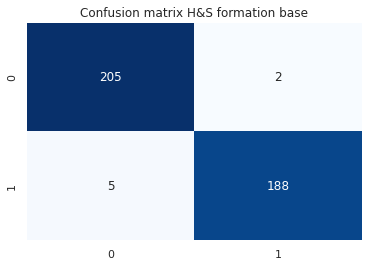

In [17]:
sns.heatmap(confusion_matrix(y_test, classes_x), annot = True, cbar = False, cmap = 'Blues', fmt = 'g')
plt.title('Confusion matrix H&S formation base')
plt.savefig('Confusion matrix H&S formation base.svg')

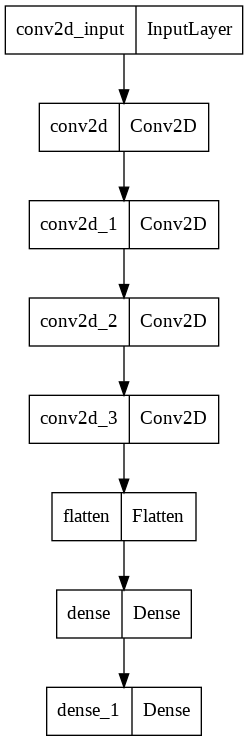

In [18]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
